<a href="https://colab.research.google.com/github/dswh/lil_nlp_with_tensorflow/blob/main/02_05_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Classification challenge

You are required to train a deep learning model on the IMDB reviews dataset and classify a set of new reviews as positive(1) or negative(0) using the trained model.

In [ ]:
##import the required libraries and APIs
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

print(tf.__version__)

2.4.1


## Downloading the TensorFlow `imdb_review` dataset

> Make sure tensorflow_datasets is installed

In [ ]:
##load the imdb reviews dataset
data, info = tfds.load("____", with_info=____, as_supervised=____)

## Segregating training and testing sets

In [ ]:
##segregate training and test set
train_data, test_data = data['____'], data['____']

##create empty list to store sentences and labels
train_sentences = []
test_sentences = []

train_labels = []
test_labels = []

In [ ]:
##iterate over the train data to extract sentences and labels
for sent, label in ____:
    train_sentences.append(str(sent.numpy().decode('utf8')))
    train_labels.append(label.numpy())

##iterate over the test set to extract sentences and labels
for sent, label in ____:
    test_sentences.append(str(sent.numpy().decode('utf8')))
    test_labels.append(label.numpy())



In [ ]:
##convert lists into numpy array
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

## Data preparation - setting up the tokenizer

In [ ]:
##define the parameters for the tokenizing and padding
vocab_size = ____
embedding_dim = ____
max_length = ____
trunc_type='post'
oov_tok = "<OOV>"


In [ ]:
tokenizer = Tokenizer(num_words = ____, oov_token=____)
tokenizer.fit_on_texts(____)
word_index = tokenizer.word_index

##training sequences and labels
train_seqs = tokenizer.texts_to_sequences(____)
train_padded = pad_sequences(____, maxlen=max_length, truncating=trunc_type)

##testing sequences and labels
test_seqs = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_seqs,maxlen=max_length)

## Define the Neural Network with Embedding layer

1. Use the Sequential API.
2. Add an embedding input layer of input size equal to vocabulary size.
3. Add a flatten layer, and two dense layers.

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.____(____, ____, input_length=____),
    tf.keras.layers.____(),
    tf.keras.layers.____(24, activation='relu'),
    tf.keras.layers.____(1, activation='sigmoid')
])

##compile the model with loss function, optimizer and metrics
model.compile(loss='____',optimizer='____',metrics=['accuracy'])
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
global_average_pooling1d_2 ( (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


## Model Training

In [ ]:
num_epochs = 10

##train the model with training and validation set
history = model.fit(
    ____,   #training sequence
    ____, # training labels
    epochs=num_epochs, 
    validation_data=(____, ____) # test data
    )

Epoch 1/10
782/782 [==============================] - 5s 6ms/step - loss: 0.6111 - accuracy: 0.6681 - val_loss: 0.3544 - val_accuracy: 0.8459
Epoch 2/10
782/782 [==============================] - 4s 5ms/step - loss: 0.3138 - accuracy: 0.8677 - val_loss: 0.3387 - val_accuracy: 0.8518
Epoch 3/10
782/782 [==============================] - 4s 5ms/step - loss: 0.2472 - accuracy: 0.9046 - val_loss: 0.3424 - val_accuracy: 0.8536
Epoch 4/10
782/782 [==============================] - 4s 5ms/step - loss: 0.2064 - accuracy: 0.9223 - val_loss: 0.3679 - val_accuracy: 0.8470
Epoch 5/10
782/782 [==============================] - 4s 5ms/step - loss: 0.1790 - accuracy: 0.9369 - val_loss: 0.4027 - val_accuracy: 0.8393
Epoch 6/10
782/782 [==============================] - 4s 5ms/step - loss: 0.1561 - accuracy: 0.9476 - val_loss: 0.4378 - val_accuracy: 0.8334
Epoch 7/10
782/782 [==============================] - 4s 6ms/step - loss: 0.1401 - accuracy: 0.9533 - val_loss: 0.4786 - val_accuracy: 0.8293
Epoch 

## Visualise the train & validation accuracy and loss

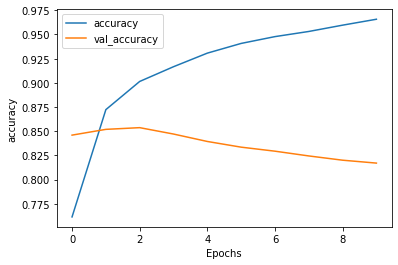

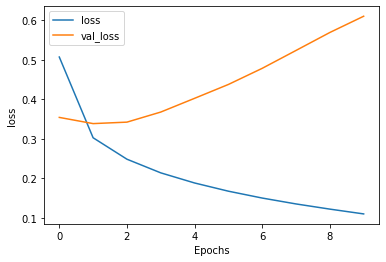

In [ ]:
import matplotlib.pyplot as plt

##plot the scores from history
def plot_metrics(history, metric):
  plt.plot(history.history[____])
  plt.plot(history.history['val_'+ ____])
  plt.legend([string, 'val_'+____])
  plt.xlabel("Epochs")
  plt.ylabel(____)
  plt.show()
  
##plot accuracy
plot_metrics(history, "____")

##plot loss
plot_metrics(history, "____")

## Classify new reviews

In [ ]:
sentence = ["The first part of the movie was dull and boring!", "We watched Queen's Gambit, all seven hours of it, in a single sitting. This show is an absolute gem."]

##prepare the sequences of the sentences in question
sequences = tokenizer.____(____)
padded_seqs = ____(____, maxlen=max_length, truncating=trunc_type)

##print the classification score
print(model.predict(____))

[[0.05418146]
 [0.68782663]]
